In [8]:
# Various Imputation Techniques 

# Mean Imputation 

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Define imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(imputed_df)

          A         B
0  1.000000  5.000000
1  2.000000  6.666667
2  2.333333  7.000000
3  4.000000  8.000000


In [9]:
# Median Imputation

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Define imputer
imputer = SimpleImputer(strategy='median')

# Impute missing values
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(imputed_df)

     A    B
0  1.0  5.0
1  2.0  7.0
2  2.0  7.0
3  4.0  8.0


In [10]:
# Mode Imputation

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Define imputer
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(imputed_df)

     A    B
0  1.0  5.0
1  2.0  5.0
2  1.0  7.0
3  4.0  8.0


In [11]:
# K-nearest neighbours Imputation

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Define imputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(imputed_df)

     A    B
0  1.0  5.0
1  2.0  6.5
2  2.5  7.0
3  4.0  8.0


In [12]:
# Interpolation Imputation

import pandas as pd
import numpy as np

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Impute missing values using linear interpolation
interpolated_df = df.interpolate(method='linear')
print(interpolated_df)

     A    B
0  1.0  5.0
1  2.0  6.0
2  3.0  7.0
3  4.0  8.0


In [13]:
# Extrapolation Imputation

import pandas as pd
import numpy as np
from scipy import interpolate

# Create example dataset
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, np.nan, np.nan, 8]})

# Separate the data into known and unknown values
known_df = df[df['B'].notnull()]
unknown_df = df[df['B'].isnull()]

# Fit a polynomial interpolation model to the known values
f = interpolate.interp1d(known_df['A'], known_df['B'], kind='linear', fill_value="extrapolate")

# Extrapolate missing values
imputed_df = df.copy()
imputed_df.loc[imputed_df['B'].isnull(), 'B'] = f(unknown_df['A'])

print(imputed_df)


   A    B
0  1  5.0
1  2  6.0
2  3  7.0
3  4  8.0


In [14]:
# MICE

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Define imputer
imputer = IterativeImputer(random_state=0)

# Impute missing values
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(imputed_df)


          A         B
0  1.000000  5.000000
1  2.000000  6.000046
2  2.999841  7.000000
3  4.000000  8.000000


In [17]:
# Regression Imputation

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create example dataset with NaN values
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, np.nan, np.nan, 8]})

# Split the data into known and unknown values
known_df = df[df['B'].notnull()]
unknown_df = df[df['B'].isnull()]

# Train a linear regression model to predict column 'B' based on column 'A'
reg = LinearRegression()
reg.fit(known_df[['A']], known_df['B'])

# Use the regression model to impute the missing values in column 'B'
imputed_df = df.copy()
imputed_df.loc[imputed_df['B'].isnull(), 'B'] = reg.predict(unknown_df[['A']])

print(imputed_df)


   A    B
0  1  5.0
1  2  6.0
2  3  7.0
3  4  8.0


In [16]:
# Hot-Deck Imputation 

import pandas as pd
import numpy as np

# Create example dataset
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, 7, 8]})

# Impute missing values using hot-deck imputation
imputed_df = df.copy()
for i in range(len(imputed_df)):
    if np.isnan(imputed_df.loc[i, 'B']):
        imputed_df.loc[i, 'B'] = imputed_df.loc[imputed_df['B'].notnull(), 'B'].sample().values[0]

print(imputed_df)


     A    B
0  1.0  5.0
1  2.0  5.0
2  NaN  7.0
3  4.0  8.0


# Different Data Visualisation Techniques

Text(0.5, 0.98, 'Data Visualization Techniques')

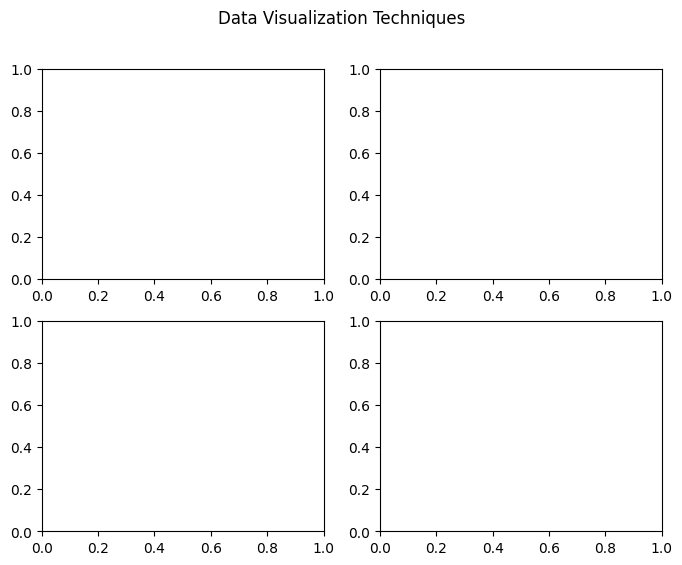

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/2)

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Data Visualization Techniques')


In [17]:
# Line plot
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 0].plot(x, y2, label='cos(x)')
axs[0, 0].set_title('Line Plot')
axs[0, 0].legend()

# Scatter plot
data = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/iris.csv')
axs[0, 1].scatter(data['sepal_length'], data['sepal_width'], c=data['species'].astype('category').cat.codes, cmap='viridis')
axs[0, 1].set_title('Scatter Plot')

# Histogram
axs[1, 0].hist(y3, bins=20)
axs[1, 0].set_title('Histogram')

# Heatmap
corr = data.corr()
axs[1, 1].imshow(corr, cmap='coolwarm')
axs[1, 1].set_xticks(range(len(corr.columns)))
axs[1, 1].set_yticks(range(len(corr.columns)))
axs[1, 1].set_xticklabels(corr.columns, rotation=90)
axs[1, 1].set_yticklabels(corr.columns)
axs[1, 1].set_title('Heatmap')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_32264\221501527.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Figure size 640x480 with 0 Axes>